# Определение возраста покупателей

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)

import warnings
warnings.simplefilter('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Исследовательский анализ данных

### Считываем данные

In [2]:
data = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [4]:
data.head(5)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [5]:
datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = datagen.flow_from_dataframe(
        dataframe=data,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=25,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


### Описание данных

In [6]:
bins_count = int(data['real_age'].max() - data['real_age'].min()+1)
bins_count

100

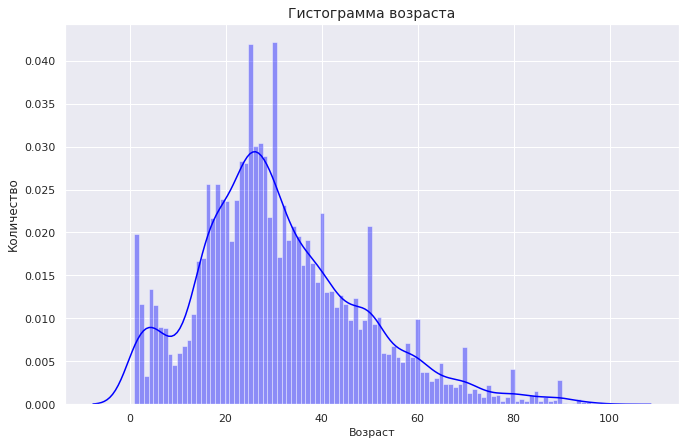

In [7]:
bins_count = data['real_age'].max() - data['real_age'].min()+1

plt.subplots(figsize = (11,7))
sns.distplot(data['real_age'], color="blue", label="", kde=True, bins=bins_count)
plt.title('Гистограмма возраста', fontsize = 14)
plt.ylabel('Количество', fontsize = 12);
plt.xlabel('Возраст', fontsize = 11);

In [8]:
data['real_age'].value_counts().sort_index(ascending=False).head(100)

100      1
97       1
96       2
95       2
94       5
93       1
91       1
90      21
89       4
88       3
87       6
86       3
85      12
84       8
83       3
82       5
81       3
80      31
79       6
78       3
77       8
76       7
75      17
74       6
73      10
72      13
71      10
70      50
69      18
68      15
67      18
66      18
65      36
64      23
63      20
62      28
61      28
60      75
59      41
58      54
57      37
56      41
55      51
54      44
53      45
52      76
51      70
50     156
49      74
48      66
47      93
46      74
45      88
44      96
43      85
42      99
41      98
40     167
39     107
38     124
37     144
36     122
35     147
34     156
33     144
32     174
31     129
30     317
29     164
28     217
27     229
26     226
25     315
24     211
23     213
22     179
21     143
20     178
19     180
18     193
17     163
16     193
15     128
14     125
13      79
12      56
11      51
10      45
9       34
8       44
7       67

In [9]:
features, target = next(train_gen_flow)

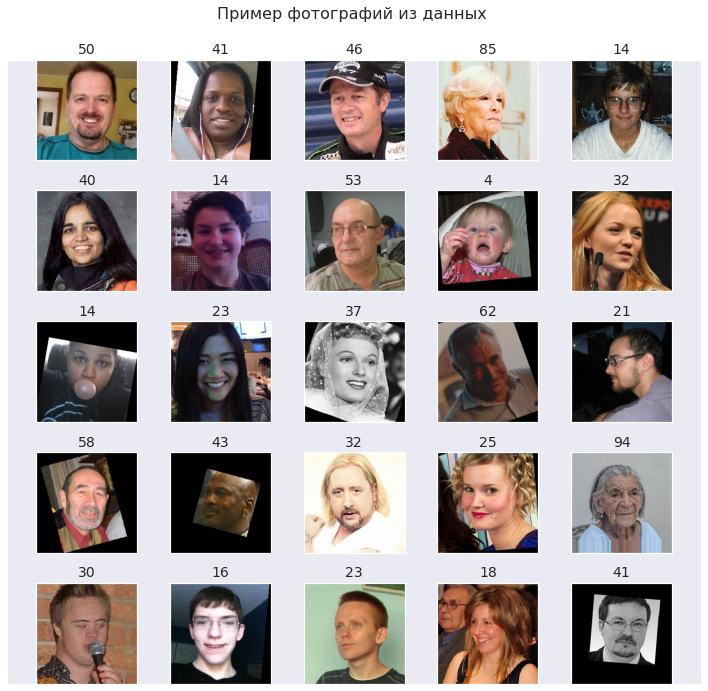

In [10]:
fig = plt.figure(figsize=(10,10))
plt.title(f'Пример фотографий из данных \n\n', fontsize = 16)
plt.xticks([])
plt.yticks([])
for i in range(25):
    fig.add_subplot(5, 5, i+1)
    plt.title(target[i], fontsize = 14)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()


<br/>

<div class="alert alert-info">
<h2> Вывод <a class="tocSkip"> </h2>

1.  Видим, что фотографии в основном ориентированы вертикально (портретно).
    
    Это хорошо, потому что в кассовой зоне люди, как правило, тоже перемещаются лицом вверх (могут быть редкие исключения в алкомаркетах)
    
    Соответственно, для обучения модели картинки переворачивать их не нужно

    
2.  Мы преобразовали фоторграфии, чтобы на вход модель получала изображения размером 224*224 потому, что сетка ResNet50 предобучалась на изображениях именно такого размера 
    
    
3.  В данных мы видим как цветные, так и черно-белые фотографии
<br/>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```

# < скопируйте результат вывода на экран сюда >
# < длинные строки со скачиванием модели можно удалить >

Found 6073 validated image filenames.
Found 1518 validated image filenames.

<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 190 steps, validate for 48 steps
Epoch 1/13
2022-06-12 22:41:16.304134: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-06-12 22:41:18.656030: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
190/190 - 68s - loss: 225.0150 - mae: 11.4076 - val_loss: 367.1389 - val_mae: 14.2275
Epoch 2/13
190/190 - 36s - loss: 139.8263 - mae: 9.0457 - val_loss: 334.9409 - val_mae: 13.5526
Epoch 3/13
190/190 - 36s - loss: 110.2014 - mae: 7.9870 - val_loss: 311.8938 - val_mae: 13.1074
Epoch 4/13
190/190 - 36s - loss: 78.3118 - mae: 6.7470 - val_loss: 235.5904 - val_mae: 12.2633
Epoch 5/13
190/190 - 36s - loss: 63.8159 - mae: 6.1517 - val_loss: 147.0995 - val_mae: 9.1233
Epoch 6/13
190/190 - 36s - loss: 40.4929 - mae: 4.9541 - val_loss: 123.7988 - val_mae: 8.3657
Epoch 7/13
190/190 - 36s - loss: 30.6061 - mae: 4.2699 - val_loss: 110.3808 - val_mae: 8.0059
Epoch 8/13
190/190 - 36s - loss: 23.4982 - mae: 3.7412 - val_loss: 113.2618 - val_mae: 8.3238
Epoch 9/13
190/190 - 36s - loss: 17.9057 - mae: 3.2729 - val_loss: 95.5767 - val_mae: 7.3115
Epoch 10/13
190/190 - 36s - loss: 15.3580 - mae: 3.0390 - val_loss: 111.9219 - val_mae: 7.9772
Epoch 11/13
190/190 - 36s - loss: 14.4568 - mae: 2.9366 - val_loss: 113.7705 - val_mae: 8.5443
Epoch 12/13
190/190 - 36s - loss: 12.3802 - mae: 2.7097 - val_loss: 100.3381 - val_mae: 7.4711
Epoch 13/13
190/190 - 36s - loss: 12.1080 - mae: 2.6781 - val_loss: 91.7267 - val_mae: 7.3536
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
48/48 - 7s - loss: 91.7267 - mae: 7.3536
Test MAE: 7.3536

```

## Анализ модели

<br/>

<div class="alert alert-info">
<h2> Вывод <a class="tocSkip"> </h2>

Для решения задачи регресии по предсказанию возраста человека, изображенную на картинке, 
использовали сверточную нейронную сеть архитектуры ResNet50.

MAE итоговой моддели mae = 7.3536, т.е. модель в среднем ошибается на 7 лет.
С одной стороны - 7 лет это не так много, модель позволит определить возрастную группу покупателей лоя рекомендации товаров.
С другой стороны, это слишком много для того, чтобы крнтролировать кассиров на продажу алкоголя несовершеннолетним: модель может 17-летного принять за 21-летнего и наоборот

<br/>
    